<a href="https://colab.research.google.com/github/Manolo1109/Examen1_AnalisisCuantitativo/blob/main/Taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np #Librería para manejar arreglos y vectores
import matplotlib.pyplot as plt #Librería para generación de gráficos
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2
import scipy.stats as stats
import pylab
import statsmodels.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.stats.diagnostic as diag
import statsmodels.stats.stattools as st



In [3]:
def atipicos_mahalanobis(alphas, df_mh, diagonal_dh):

  cut_off = []
  for alpha in alphas:
    C = np.sqrt(chi2.ppf(1-alpha, df = df_mh.shape[1]))
    cut_off.append(C)
    print("Cantidad de datos atípicos con alpha de", alpha, ":", sum(diagonal_dh > C))
  return cut_off

# Punto 1
Considere el conjunto de datos “Boston Housing Data” presentados en Harrison and Rubinfeld
(1978). Defina como variable respuesta a la columna MEDV. Realice una partición 80-20, donde
el primer 80% de los datos son datos de entrenamiento y el restante 20% son datos para prueba

In [4]:
#boston = datasets.load_boston()
#boston

In [5]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
#target = raw_df.values[1::2, 2]

columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

In [6]:
df_punto1 = pd.DataFrame(data, columns=columns)
df_punto1.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [7]:
df_punto1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Punto 1.1
Genere los modelos de regresión por regularización Ridge, LASSO y Elastic-Net para los
datos de entrenamiento. Encuentre los valores óptimos de alpha y lambda junto a su respectiva gráfica
de evolución de los coeficientes de regresión. Compare los modelos en términos de la selección
de variables, interprete los coeficientes y escriba la ecuación ajustada de regresión para cada
caso. Finalmente, realice una predicción con las observaciones de prueba y determine cual
de los tres modelos es el mejor en capacidad predictiva (RMSE)

In [8]:
punto1_X = df_punto1.drop(["MEDV"], axis = 1)
punto1_y = df_punto1[["MEDV"]]

In [9]:
punto1_X_train, punto1_X_test, punto1_y_train, punto1_y_test = train_test_split(punto1_X, punto1_y, test_size=0.2, random_state=123)

In [10]:
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
coefficients = []

In [11]:
data_punto1_X = punto1_X_train.values
data_punto1_y = punto1_y_train.values

In [12]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=47)

model_ridge = RidgeCV(alphas=np.arange(0.1,10,0.1), cv = cv, scoring="neg_mean_absolute_error")

model_ridge.fit(data_punto1_X, data_punto1_y)

RidgeCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=47),
        scoring='neg_mean_absolute_error')

In [13]:
model_ridge.alpha_

0.6

In [14]:
model_ridge.coef_

array([[-9.68497251e-02,  4.77608875e-02,  4.64946158e-02,
         1.14197484e+00, -1.04035319e+01,  4.37140345e+00,
        -5.80508519e-03, -1.29259140e+00,  2.71743818e-01,
        -1.31369348e-02, -8.55884876e-01,  7.45489859e-03,
        -5.49085940e-01]])

In [15]:
model_ridge_mejor_alpha = Ridge(alpha = 0.6)

scores = cross_val_score(model_ridge_mejor_alpha, data_punto1_X, data_punto1_y, cv = cv, scoring="neg_mean_absolute_error")

MAE = np.mean(-1*scores)
print(MAE)

3.3032954766781613


In [16]:
model_ridge_mejor_alpha_fit = model_ridge_mejor_alpha.fit(data_punto1_X, data_punto1_y)
model_ridge_mejor_alpha_fit.coef_

array([[-9.68497251e-02,  4.77608875e-02,  4.64946158e-02,
         1.14197484e+00, -1.04035319e+01,  4.37140345e+00,
        -5.80508519e-03, -1.29259140e+00,  2.71743818e-01,
        -1.31369348e-02, -8.55884876e-01,  7.45489859e-03,
        -5.49085940e-01]])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'CRIM'),
  Text(1, 0, 'ZN'),
  Text(2, 0, 'INDUS'),
  Text(3, 0, 'CHAS'),
  Text(4, 0, 'NOX'),
  Text(5, 0, 'RM'),
  Text(6, 0, 'AGE'),
  Text(7, 0, 'DIS'),
  Text(8, 0, 'RAD'),
  Text(9, 0, 'TAX'),
  Text(10, 0, 'PTRATIO'),
  Text(11, 0, 'B'),
  Text(12, 0, 'LSTAT')])

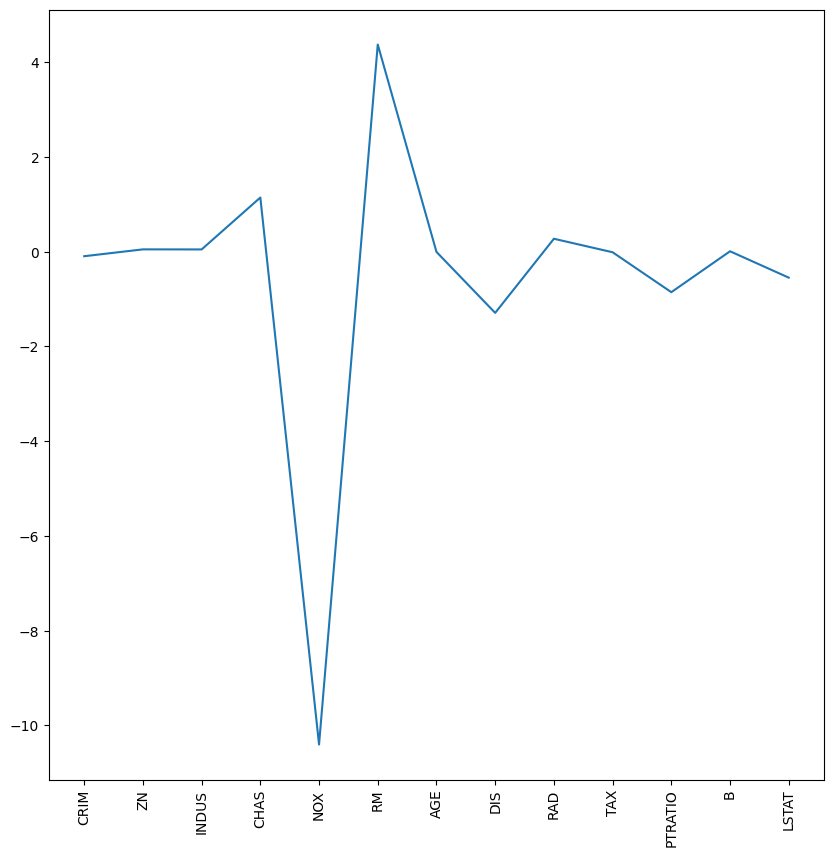

In [17]:
plt.figure(figsize = (10,10))
plt.plot(df_punto1.drop(["MEDV"], axis = 1).columns, model_ridge_mejor_alpha_fit.coef_[0])
plt.xticks(rotation = 90)

In [18]:
y_pred_ridge = model_ridge_mejor_alpha_fit.predict(punto1_X_test)

# Calcula el error cuadrático medio (MSE)
rmse_ridge = np.sqrt(mean_squared_error(punto1_y_test, y_pred_ridge))

# Calcula el coeficiente de determinación (R^2)
r2_ridge = r2_score(punto1_y_test, y_pred_ridge)

print(f'RMSE Ridge: {rmse_ridge}')
print(f'R^2 Ridge: {r2_ridge}')

RMSE Ridge: 5.357763948298347
R^2 Ridge: 0.653044389821414


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [19]:
#Aplicar lasso para penalizar variables
model_lasso = LassoCV(alphas=np.arange(0.001, 2,0.5), cv = cv)
model_lasso.fit(data_punto1_X, data_punto1_y)
print(model_lasso.alpha_)

0.001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
model_lasso_mejor_alpha = Lasso(alpha = 0.001)

model_lasso_mejor_alpha_fit = model_lasso_mejor_alpha.fit(data_punto1_X, data_punto1_y)

In [21]:
model_lasso_mejor_alpha_fit.coef_

array([-9.86546925e-02,  4.75151975e-02,  6.55798276e-02,  1.24430205e+00,
       -1.51296974e+01,  4.32185490e+00, -1.25809400e-03, -1.36066532e+00,
        2.83710545e-01, -1.27824325e-02, -9.09686582e-01,  7.24255578e-03,
       -5.44254979e-01])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'CRIM'),
  Text(1, 0, 'ZN'),
  Text(2, 0, 'INDUS'),
  Text(3, 0, 'CHAS'),
  Text(4, 0, 'NOX'),
  Text(5, 0, 'RM'),
  Text(6, 0, 'AGE'),
  Text(7, 0, 'DIS'),
  Text(8, 0, 'RAD'),
  Text(9, 0, 'TAX'),
  Text(10, 0, 'PTRATIO'),
  Text(11, 0, 'B'),
  Text(12, 0, 'LSTAT')])

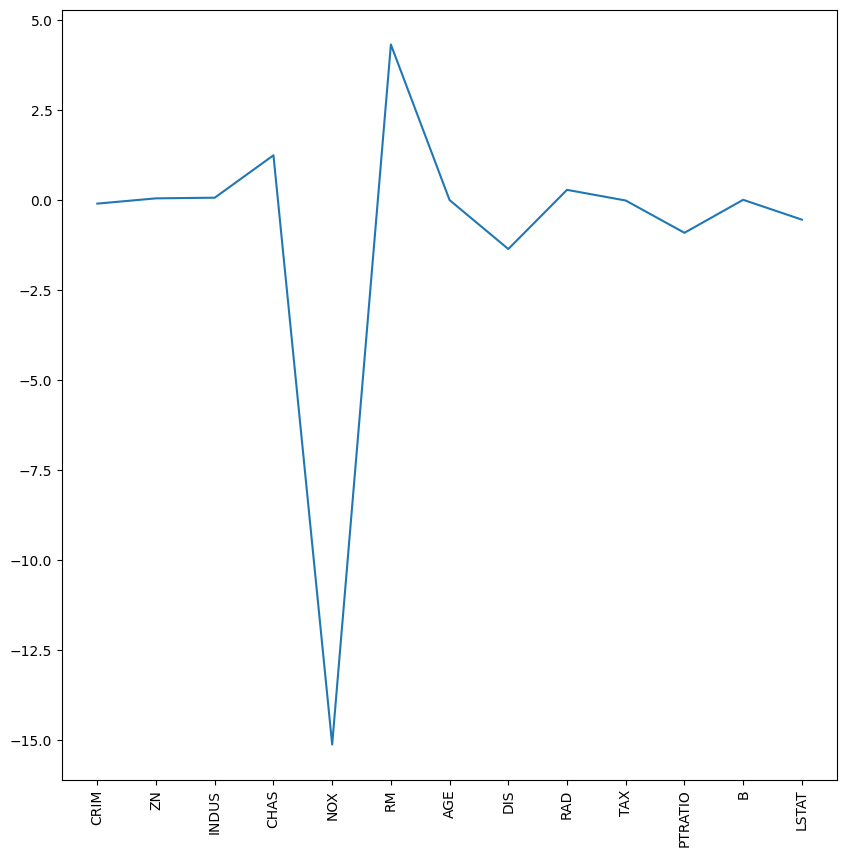

In [22]:
plt.figure(figsize = (10,10))
plt.plot(df_punto1.drop(["MEDV"], axis = 1).columns, model_lasso_mejor_alpha_fit.coef_)
plt.xticks(rotation = 90)

In [23]:
y_pred_lasso = model_lasso_mejor_alpha_fit.predict(punto1_X_test)

# Calcula el error cuadrático medio (MSE)
rmse_lasso = np.sqrt(mean_squared_error(punto1_y_test, y_pred_lasso))

# Calcula el coeficiente de determinación (R^2)
r2_lasso = r2_score(punto1_y_test, y_pred_lasso)

print(f'RMSE Lasso: {rmse_lasso}')
print(f'R^2 Lasso: {r2_lasso}')

RMSE Lasso: 5.313529994964351
R^2 Lasso: 0.6587497044773172


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [24]:
#Aplicar elastic-net mejor alpha y lambda
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0],
    'l1_ratio': [0.001, 0.01, 0.1, 0.5, 0.7, 0.9],
}

# Crear un objeto ElasticNet
elastic_net = ElasticNet()

# Realizar una búsqueda en cuadrícula con validación cruzada para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(data_punto1_X, data_punto1_y)  # clean_data es el conjunto de datos sin valores atípicos

# Obtener los mejores valores de alpha y l1_ratio
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

# Crear un nuevo modelo ElasticNet con los mejores hiperparámetros y ajustarlo a los datos limpios
best_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
best_elastic_net_fit = best_elastic_net.fit(data_punto1_X, data_punto1_y)

In [25]:
best_elastic_net_fit.coef_

array([-9.81725446e-02,  4.75740049e-02,  6.04910376e-02,  1.21914593e+00,
       -1.38668927e+01,  4.33671142e+00, -2.48743241e-03, -1.34247826e+00,
        2.80465768e-01, -1.28749920e-02, -8.95237925e-01,  7.29999281e-03,
       -5.45436152e-01])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'CRIM'),
  Text(1, 0, 'ZN'),
  Text(2, 0, 'INDUS'),
  Text(3, 0, 'CHAS'),
  Text(4, 0, 'NOX'),
  Text(5, 0, 'RM'),
  Text(6, 0, 'AGE'),
  Text(7, 0, 'DIS'),
  Text(8, 0, 'RAD'),
  Text(9, 0, 'TAX'),
  Text(10, 0, 'PTRATIO'),
  Text(11, 0, 'B'),
  Text(12, 0, 'LSTAT')])

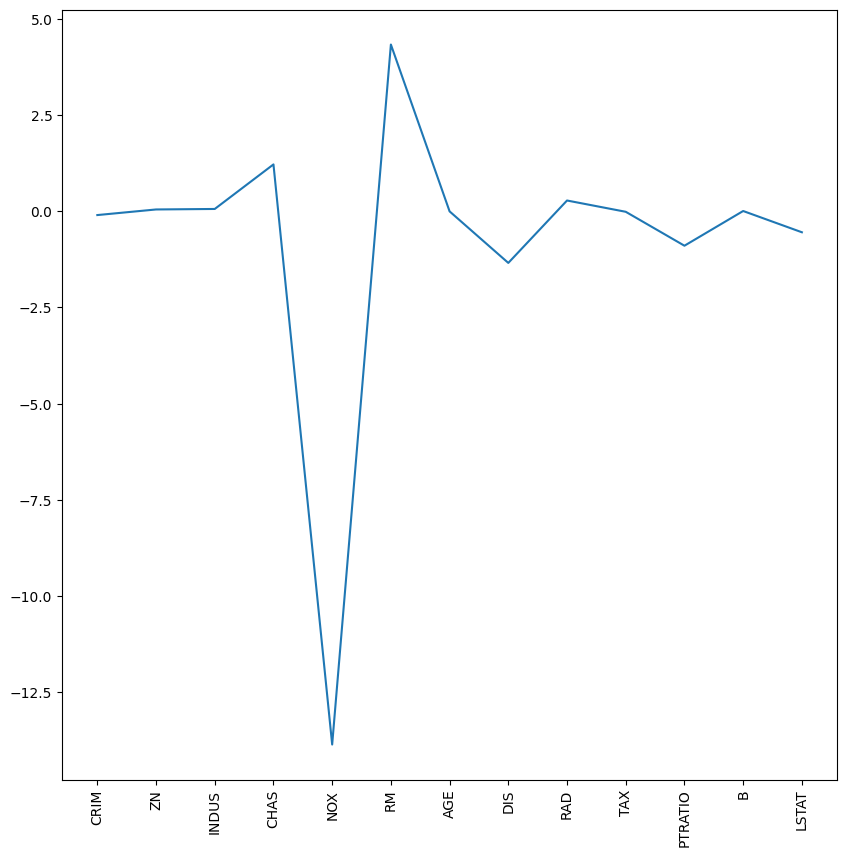

In [26]:
plt.figure(figsize = (10,10))
plt.plot(df_punto1.drop(["MEDV"], axis = 1).columns, best_elastic_net_fit.coef_)
plt.xticks(rotation = 90)

In [27]:
y_pred_elastic_net = best_elastic_net_fit.predict(punto1_X_test)

# Calcula el error cuadrático medio (MSE)
rmse_elastic_net = np.sqrt(mean_squared_error(punto1_y_test, y_pred_elastic_net))

# Calcula el coeficiente de determinación (R^2)
r2_elastic_net = r2_score(punto1_y_test, y_pred_elastic_net)

print(f'RMSE ElasticNet: {rmse_elastic_net}')
print(f'R^2 ElasticNet: {r2_elastic_net}')

RMSE ElasticNet: 5.324111649400856
R^2 ElasticNet: 0.6573891820858937


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


Lasso fue el modelo con menor RMSE respecto a Ridge y Elastic Net, por lo que Lasso tiene mejor capacidad predictiva

Realizamos una comparación de los coeficientes de los tres modelos calculados:

In [28]:

B= pd.DataFrame([[model_ridge_mejor_alpha_fit.intercept_] + list(model_ridge_mejor_alpha_fit.coef_[0]), [model_lasso_mejor_alpha_fit.intercept_]  + list(model_lasso_mejor_alpha_fit.coef_), [best_elastic_net_fit.intercept_] + list(best_elastic_net_fit.coef_ )], columns=["Intercepto", "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"], index=["Ridge", "Lasso", "Elastic Net"])
B



,Intercepto,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Ridge,[28.177985929562638],-0.096850,0.047761,0.046495,1.141975,-10.403532,4.371403,-0.005805,-1.292591,0.271744,-0.013137,-0.855885,0.007455,-0.549086
Lasso,[31.597088221007102],-0.098655,0.047515,0.065580,1.244302,-15.129697,4.321855,-0.001258,-1.360665,0.283711,-0.012782,-0.909687,0.007243,-0.544255
Elastic Net,[30.670757811760915],-0.098173,0.047574,0.060491,1.219146,-13.866893,4.336711,-0.002487,-1.342478,0.280466,-0.012875,-0.895238,0.007300,-0.545436


y concluimos que los coeficientes de los tres modelos son muy similares entre si, solo hay diferencias notables para la vairable "NOX", y ligeramente para el intercepto con el eje y.

La variable predictora más importante es NOX, ya que tiene el valor absoluto mas alto que el resto de variables, y de igual manera esta tiene una relación negativa con la variable respuesta.

Las ecuaciones ajustadas de regresion para cada caso serian:

**Ecuación con regularización de Ridge:**

*MEDV = 28.1779 - 0.096850 * CRIM + 0.047761 * ZN + 0.046495 * INDUS + 1.141975 * CHAS - 10.403532 * NOX + 4.371403 * RM - 0.005805 * AGE - 1.292591 * DIS + 0.271744 * RAD - 0.013137 * TAX - 0.855885 * PTRATIO + 0.007455 * B - 0.549086 * LSTAT
*

**Ecuación con regularización de Lasso:**

*MEDV = 31.59708	- 0.098655 * CRIM + 0.047515 * ZN + 0.065580 * INDUS + 1.244302	* CHAS - 15.129697	* NOX + 4.321855	* RM - 0.001258	* AGE - 1.360665	* DIS + 0.283711	* RAD - 0.012782	* TAX - 0.909687	* PTRATIO + 0.007243	* B - 0.544255 * LSTAT
*

**Ecuación con regularización de Elastic Net:**

*MEDV = 30.67075	- 0.098173 * CRIM +	0.047574 * ZN +	0.060491 * INDUS + 1.219146	* CHAS - 13.866893	* NOX + 4.336711	* RM - 0.002487	* AGE - 1.342478	* DIS + 0.280466	* RAD - 0.012875	* TAX - 0.895238	* PTRATIO + 0.007300	* B - 0.545436 * LSTAT
*


## Punto 1.2

Detecte las observaciones atípicas multivariantes de la muestra, usando q = 0:90; 0:95; 0:975; 0:99

In [29]:
x_dm = df_punto1.copy()
x_menos_mu = x_dm - np.mean(x_dm)
cov = x_dm.cov()
inv_cov = np.linalg.inv(cov)

left_term = np.dot(x_menos_mu, inv_cov)
mahal2 = np.dot(left_term, x_menos_mu.T)
mahal = np.sqrt(mahal2)
D_h = mahal.diagonal()
D_h

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-29-7ba82d50d074>:8: RuntimeWarning: invalid value encountered in sqrt
  mahal = np.sqrt(mahal2)


array([ 3.0318429 ,  2.2686999 ,  2.39811835,  2.8241484 ,  3.20072165,
        2.65028609,  2.46153565,  4.10582652,  5.17986839,  3.69799905,
        4.19201261,  3.3557695 ,  2.80646274,  2.44860587,  2.53267985,
        2.46579795,  3.25543818,  2.22789495,  3.41919886,  2.28088784,
        2.87958777,  2.42408969,  2.64950466,  2.87934605,  2.61199792,
        2.66636546,  2.6106543 ,  2.66884117,  2.7628856 ,  2.59120961,
        2.97461043,  2.93708775,  4.17612667,  2.64714586,  3.23443459,
        2.25197727,  2.03557093,  2.25215645,  2.63175866,  3.83807333,
        3.9464988 ,  3.55849955,  3.24794434,  3.26975553,  2.15638922,
        2.45387163,  2.52019998,  3.1889759 ,  5.08159679,  2.72187625,
        2.36537852,  2.69104111,  2.40419062,  2.43902145,  5.02185441,
        4.23321152,  3.802918  ,  4.40936247,  2.87595667,  2.45269477,
        3.01279183,  3.8269654 ,  3.10607009,  3.11316799,  4.74547227,
        3.74661747,  3.91968481,  2.46895171,  2.36896144,  2.20

In [30]:
alphas = [0.1, 0.05, 0.025, 0.01]
cut_off = atipicos_mahalanobis(alphas, x_dm ,D_h)

Cantidad de datos atípicos con alpha de 0.1 : 81
Cantidad de datos atípicos con alpha de 0.05 : 64
Cantidad de datos atípicos con alpha de 0.025 : 49
Cantidad de datos atípicos con alpha de 0.01 : 39


In [31]:
cut_off

[4.58956906615393, 4.866702302878262, 5.1106700191890075, 5.398262474229351]

en un gráfico muestre las distancias calculadas para cada individuo y los puntos de corte

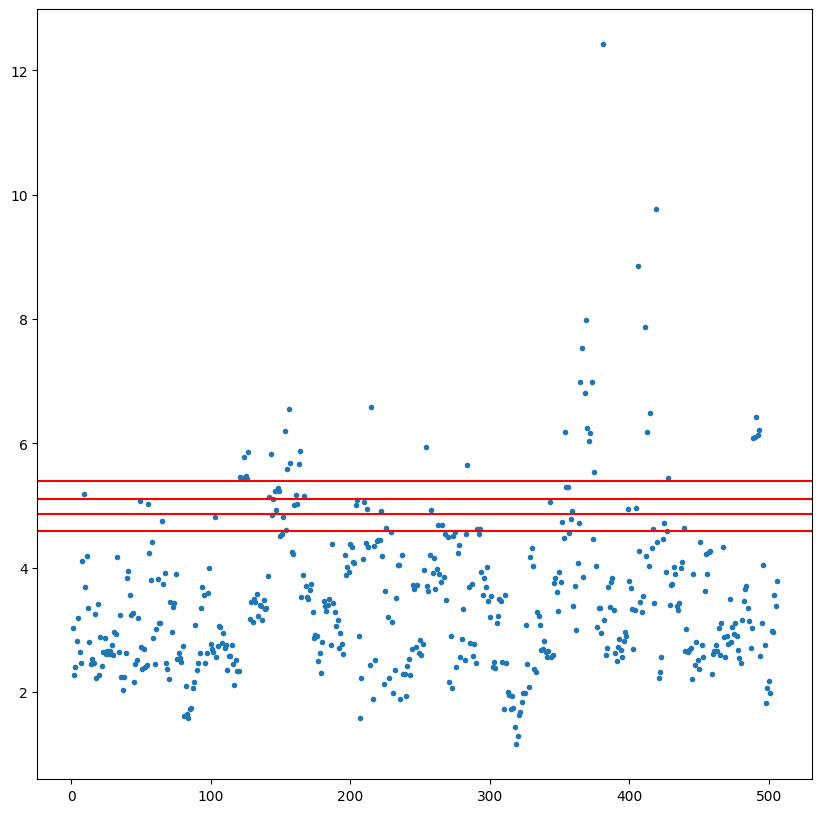

In [32]:
x_grafica = np.arange(1, 507, 1)

plt.figure(figsize = (10,10))
plt.plot(x_grafica, D_h, ".")
plt.axhline(y=cut_off[0], color='r', linestyle='-', label='y=0.9')
plt.axhline(y=cut_off[1], color='r', linestyle='-', label='y=0.95')
plt.axhline(y=cut_off[2], color='r', linestyle='-', label='y=0.975')
plt.axhline(y=cut_off[3], color='r', linestyle='-', label='y=0.99')

¿Qué puede concluir acerca de los individuos atípicos para cada punto de corte?:

Lo que se concluye a partir de los diferentes percentiles es que entre mayor sea el percentil, se vuelve más flexible en la selección de los datos atipicos, es decir, toma como dato atípico los datos que estén mucho más alejados del individuo ideal o equilibrio

¿Quienes son los individuos atípicos?

Inividuos atípicos percentil 0.90:

In [33]:
x_dm.loc[D_h > cut_off[0], :]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
8,0.21124,12.5,7.87,0.0,0.5240,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
48,0.25387,0.0,6.91,0.0,0.4480,5.399,95.3,5.8700,3.0,233.0,17.9,396.90,30.81,14.4
54,0.01360,75.0,4.00,0.0,0.4100,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,18.9
64,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05,33.0
102,0.22876,0.0,8.56,0.0,0.5200,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63,18.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.15086,0.0,27.74,0.0,0.6090,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0.0,0.6090,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0.0,0.6090,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
491,0.10574,0.0,27.74,0.0,0.6090,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6


Inividuos atípicos percentil 0.95:

In [34]:
x_dm.loc[D_h > cut_off[1], :]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
48,0.25387,0.0,6.91,0.0,0.448,5.399,95.3,5.8700,3.0,233.0,17.9,396.90,30.81,14.4
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,18.9
120,0.06899,0.0,25.65,0.0,0.581,5.870,69.7,2.2577,2.0,188.0,19.1,389.15,14.37,22.0
121,0.07165,0.0,25.65,0.0,0.581,6.004,84.1,2.1974,2.0,188.0,19.1,377.67,14.27,20.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6


Inividuos atípicos percentil 0.975:

In [35]:
x_dm.loc[D_h > cut_off[2], :]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
120,0.06899,0.0,25.65,0.0,0.581,5.870,69.7,2.2577,2.0,188.0,19.1,389.15,14.37,22.0
121,0.07165,0.0,25.65,0.0,0.581,6.004,84.1,2.1974,2.0,188.0,19.1,377.67,14.27,20.3
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,20.5
123,0.15038,0.0,25.65,0.0,0.581,5.856,97.0,1.9444,2.0,188.0,19.1,370.31,25.41,17.3
124,0.09849,0.0,25.65,0.0,0.581,5.879,95.8,2.0063,2.0,188.0,19.1,379.38,17.58,18.8
125,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81,21.4
126,0.38735,0.0,25.65,0.0,0.581,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26,15.7
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4
142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82,13.4


Inividuos percentil 0.99:

In [36]:
x_dm.loc[D_h > cut_off[3], :]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
120,0.06899,0.0,25.65,0.0,0.581,5.870,69.7,2.2577,2.0,188.0,19.1,389.15,14.37,22.0
121,0.07165,0.0,25.65,0.0,0.581,6.004,84.1,2.1974,2.0,188.0,19.1,377.67,14.27,20.3
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,20.5
123,0.15038,0.0,25.65,0.0,0.581,5.856,97.0,1.9444,2.0,188.0,19.1,370.31,25.41,17.3
124,0.09849,0.0,25.65,0.0,0.581,5.879,95.8,2.0063,2.0,188.0,19.1,379.38,17.58,18.8
125,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81,21.4
126,0.38735,0.0,25.65,0.0,0.581,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26,15.7
142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82,13.4
152,1.12658,0.0,19.58,1.0,0.871,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12,15.3
154,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12,17.0


## Punto 1.3

Realice dos modelos de regresión Robusto–Regularizado, combinando la técnica de detección de atípicos multivariantes más la regularización Elastic-Net. Encuentre los valores óptimos de alpha y lambda, interprete los coeficientes de regresión, escriba la respectiva ecuación de regresión resultante y valide los supuestos del modelo. Finalmente, realice una predicción con las observaciones de prueba y determine el RMSE de estos dos modelos. Compare los resultados con los modelos estimados en el ítem 1.

### Modelo 1

Estandarizar las variables

In [37]:
df_punto1_estandarizado = stats.zscore(df_punto1, axis=1)
df_punto1_estandarizado

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.497860,-0.347626,-0.478626,-0.497913,-0.493421,-0.443016,0.046458,-0.463764,-0.489564,1.973464,-0.370169,2.815902,-0.456334,-0.297531
1,-0.497046,-0.497288,-0.434768,-0.497288,-0.493140,-0.440507,0.200423,-0.453364,-0.479602,1.642713,-0.339883,3.012490,-0.416463,-0.306279
2,-0.493699,-0.493942,-0.430791,-0.493942,-0.489753,-0.429764,0.051821,-0.449575,-0.476078,1.667674,-0.334947,3.014933,-0.457945,-0.183992
3,-0.476950,-0.477244,-0.457459,-0.477244,-0.473087,-0.413733,-0.061584,-0.422226,-0.450017,1.537525,-0.307531,3.104235,-0.450562,-0.174121
4,-0.485383,-0.486008,-0.466289,-0.486008,-0.481865,-0.421363,0.004234,-0.431175,-0.458872,1.521994,-0.316865,3.103974,-0.437798,-0.158577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.499478,-0.500020,-0.396891,-0.500020,-0.495066,-0.443026,0.097314,-0.478593,-0.491375,1.859923,-0.318486,2.888529,-0.416427,-0.306383
502,-0.500423,-0.500810,-0.398708,-0.500810,-0.495906,-0.448433,0.155619,-0.481233,-0.492252,1.835631,-0.321084,2.896015,-0.423100,-0.324507
503,-0.508417,-0.508936,-0.407033,-0.508936,-0.504042,-0.449349,0.268366,-0.490422,-0.500394,1.822971,-0.329559,2.881298,-0.460760,-0.304787
504,-0.507428,-0.508370,-0.405827,-0.508370,-0.503445,-0.449973,0.259196,-0.487837,-0.499775,1.838165,-0.327868,2.873477,-0.452672,-0.319272


Calcular MD usando el vector de medianas en vez del vector de medias y la matriz de correlación de Spearman en vez de la matriz de covarianzas usual.

In [38]:
x_dm_modelo1 = df_punto1_estandarizado.copy()
x_menos_mu_modelo1 = x_dm_modelo1 - np.median(x_dm_modelo1, axis=0)
corr_modelo1 = x_dm_modelo1.corr('spearman')
inv_corr_modelo1 = np.linalg.inv(corr_modelo1)

left_term_modelo1 = np.dot(x_menos_mu_modelo1, inv_corr_modelo1)
mahal2_modelo1 = np.dot(left_term_modelo1, x_menos_mu_modelo1.T)
mahal_modelo1 = np.sqrt(mahal2_modelo1)
D_h_modelo1 = mahal_modelo1.diagonal()
D_h_modelo1

<ipython-input-38-a47ec5449b8e>:8: RuntimeWarning: invalid value encountered in sqrt
  mahal_modelo1 = np.sqrt(mahal2_modelo1)


array([ 1.04621815,  3.33414236,  2.95333417,  3.76934987,  3.97582541,
        3.89255559,  0.64429304,  1.32203762,  1.34415411,  0.91651207,
        1.21751288,  0.97990454,  0.44345465,  0.71397636,  0.92657072,
        0.62960538,  0.51189749,  0.92927755,  0.84002587,  0.73602523,
        1.27431313,  1.19476061,  1.31789696,  1.52743652,  1.35248418,
        0.75523435,  1.04054658,  0.82571676,  1.28440807,  0.99544449,
        1.01601724,  1.33836198,  2.14350467,  1.0287237 ,  2.13254043,
        1.60204404,  1.10620303,  1.28276171,  1.20552117,  3.21735518,
        3.27739268,  2.85863444,  2.75807279,  3.05747411,  2.90835498,
        3.06459488,  3.07929154,  3.86142408,  4.33034282,  3.41141857,
        2.66693075,  2.8660964 ,  2.62123863,  2.61162653,  1.19476533,
        5.00939283,  1.60781844,  3.85081641,  1.04524095,  1.2102964 ,
        1.396081  ,  1.74744154,  1.47335221,  1.16380471,  4.26170665,
        1.21862105,  1.16222652,  0.59275702,  0.45421314,  0.47

In [39]:
alphas = [0.1, 0.05, 0.025, 0.01]
cut_off_modelo1 = atipicos_mahalanobis(alphas, x_dm_modelo1 ,D_h_modelo1)

Cantidad de datos atípicos con alpha de 0.1 : 81
Cantidad de datos atípicos con alpha de 0.05 : 79
Cantidad de datos atípicos con alpha de 0.025 : 76
Cantidad de datos atípicos con alpha de 0.01 : 72


In [40]:
cut_off_modelo1

[4.58956906615393, 4.866702302878262, 5.1106700191890075, 5.398262474229351]

Eliminar los atípicos y con la muestra limpia estimar el modelo regularizado. (Se eliminaran los atípicos para alpha = 0.05)

In [41]:
modelo1_sin_atipicos = x_dm_modelo1.loc[D_h_modelo1 <= cut_off_modelo1[1], :]
modelo1_sin_atipicos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.497860,-0.347626,-0.478626,-0.497913,-0.493421,-0.443016,0.046458,-0.463764,-0.489564,1.973464,-0.370169,2.815902,-0.456334,-0.297531
1,-0.497046,-0.497288,-0.434768,-0.497288,-0.493140,-0.440507,0.200423,-0.453364,-0.479602,1.642713,-0.339883,3.012490,-0.416463,-0.306279
2,-0.493699,-0.493942,-0.430791,-0.493942,-0.489753,-0.429764,0.051821,-0.449575,-0.476078,1.667674,-0.334947,3.014933,-0.457945,-0.183992
3,-0.476950,-0.477244,-0.457459,-0.477244,-0.473087,-0.413733,-0.061584,-0.422226,-0.450017,1.537525,-0.307531,3.104235,-0.450562,-0.174121
4,-0.485383,-0.486008,-0.466289,-0.486008,-0.481865,-0.421363,0.004234,-0.431175,-0.458872,1.521994,-0.316865,3.103974,-0.437798,-0.158577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.499478,-0.500020,-0.396891,-0.500020,-0.495066,-0.443026,0.097314,-0.478593,-0.491375,1.859923,-0.318486,2.888529,-0.416427,-0.306383
502,-0.500423,-0.500810,-0.398708,-0.500810,-0.495906,-0.448433,0.155619,-0.481233,-0.492252,1.835631,-0.321084,2.896015,-0.423100,-0.324507
503,-0.508417,-0.508936,-0.407033,-0.508936,-0.504042,-0.449349,0.268366,-0.490422,-0.500394,1.822971,-0.329559,2.881298,-0.460760,-0.304787
504,-0.507428,-0.508370,-0.405827,-0.508370,-0.503445,-0.449973,0.259196,-0.487837,-0.499775,1.838165,-0.327868,2.873477,-0.452672,-0.319272


In [42]:
modelo1_X = modelo1_sin_atipicos.drop(["MEDV"], axis=1)
modelo1_y =modelo1_sin_atipicos["MEDV"]

In [43]:
punto1_X_train_modelo1, punto1_X_test_modelo1, punto1_y_train_modelo1, punto1_y_test_modelo1 = train_test_split(modelo1_X, modelo1_y, test_size=0.2, random_state=123)

In [44]:
#Definir hiperparámetros alpha y lambda
param_grid_modelo1 = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0],
    'l1_ratio': [0.001, 0.01, 0.1, 0.5, 0.7, 0.9],
}

# Crear un objeto ElasticNet
elastic_net = ElasticNet()

# Realizar una búsqueda en cuadrícula con validación cruzada para encontrar los mejores hiperparámetros
grid_search_modelo1 = GridSearchCV(elastic_net, param_grid_modelo1, cv=5, scoring='neg_mean_squared_error')
grid_search_modelo1.fit(punto1_X_train_modelo1, punto1_y_train_modelo1)  # clean_data es el conjunto de datos sin valores atípicos

# Obtener los mejores valores de alpha y l1_ratio
best_alpha_modelo1 = grid_search_modelo1.best_params_['alpha']
best_l1_ratio_modelo1 = grid_search_modelo1.best_params_['l1_ratio']

# Crear un nuevo modelo ElasticNet con los mejores hiperparámetros y ajustarlo a los datos limpios
best_elastic_net_modelo1 = ElasticNet(alpha=best_alpha_modelo1, l1_ratio=best_l1_ratio_modelo1)
best_elastic_net_modelo1_fit = best_elastic_net_modelo1.fit(punto1_X_train_modelo1, punto1_y_train_modelo1)
best_elastic_net_modelo1_fit

ElasticNet(alpha=0.001, l1_ratio=0.001)

In [45]:
best_elastic_net_modelo1_fit.coef_

array([-0.22052694, -0.16538617, -0.14926279, -0.06463038, -0.07311067,
        0.07332396, -0.18851352, -0.16200564, -0.04314462, -0.20447957,
       -0.24028126, -0.13377592, -0.58759581])

In [46]:
best_elastic_net_modelo1_fit.intercept_

-0.2121897082743898

La ecuación de la regresión resultante para el Modelo 1 es:

MEDV = -0.2121897082743898 - 0.22052694 * CRIM - 0.16538617 * ZN - 0.14926279 * INDUS - 0.06463038 * CHAS - 0.07311067 * NOX + 0.07332396 * RM - 0.18851352 * AGE - 0.16200564 * DIS - 0.04314462 * RAD - 0.20447957 * TAX - 0.24028126 * PTRATIO - 0.13377592 * B - 0.58759581 * LSTAT


realice una predicción con las observaciones de prueba y determine el RMSE de estos dos modelos

In [47]:
y_pred_elastic_net_modelo1 = best_elastic_net_modelo1_fit.predict(punto1_X_test_modelo1)

# Calcula el error cuadrático medio (MSE)
rmse_elastic_net_modelo1 = np.sqrt(mean_squared_error(punto1_y_test_modelo1, y_pred_elastic_net_modelo1))

# Calcula el coeficiente de determinación (R^2)
r2_elastic_net_modelo1 = r2_score(punto1_y_test_modelo1, y_pred_elastic_net_modelo1)

print(f'RMSE: {rmse_elastic_net_modelo1}')
print(f'R^2: {r2_elastic_net_modelo1}')

RMSE: 0.041211544038811464
R^2: 0.7114934693793754


Comparando el RMSE de este punto respecto al item 1, los resultados son los siguientes:

-Modelo Elastic Net item 1:

**RMSE: 5.324111649400856

**R^2: 0.6573891820858937

-Modelo Elastic Net actual (Con las variables estandarizadas, usando el vector de medianas y la matriz de correlación de Spearman, eliminando datos atípicos con MD)

**RMSE: 0.041211544038811464

**R^2: 0.7114934693793754

Se observa una mejora significativa del modelo, puesto que se redujo considerablemente el RMSE y aumentó el R^2

In [57]:
modelo1_y

0     -0.297531
1     -0.306279
2     -0.183992
3     -0.174121
4     -0.158577
         ...   
501   -0.306383
502   -0.324507
503   -0.304787
504   -0.319272
505   -0.394464
Name: MEDV, Length: 427, dtype: float64

In [59]:
modelo1_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.497860,-0.347626,-0.478626,-0.497913,-0.493421,-0.443016,0.046458,-0.463764,-0.489564,1.973464,-0.370169,2.815902,-0.456334
1,-0.497046,-0.497288,-0.434768,-0.497288,-0.493140,-0.440507,0.200423,-0.453364,-0.479602,1.642713,-0.339883,3.012490,-0.416463
2,-0.493699,-0.493942,-0.430791,-0.493942,-0.489753,-0.429764,0.051821,-0.449575,-0.476078,1.667674,-0.334947,3.014933,-0.457945
3,-0.476950,-0.477244,-0.457459,-0.477244,-0.473087,-0.413733,-0.061584,-0.422226,-0.450017,1.537525,-0.307531,3.104235,-0.450562
4,-0.485383,-0.486008,-0.466289,-0.486008,-0.481865,-0.421363,0.004234,-0.431175,-0.458872,1.521994,-0.316865,3.103974,-0.437798
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.499478,-0.500020,-0.396891,-0.500020,-0.495066,-0.443026,0.097314,-0.478593,-0.491375,1.859923,-0.318486,2.888529,-0.416427
502,-0.500423,-0.500810,-0.398708,-0.500810,-0.495906,-0.448433,0.155619,-0.481233,-0.492252,1.835631,-0.321084,2.896015,-0.423100
503,-0.508417,-0.508936,-0.407033,-0.508936,-0.504042,-0.449349,0.268366,-0.490422,-0.500394,1.822971,-0.329559,2.881298,-0.460760
504,-0.507428,-0.508370,-0.405827,-0.508370,-0.503445,-0.449973,0.259196,-0.487837,-0.499775,1.838165,-0.327868,2.873477,-0.452672


### Modelo 2

Para efectos prácticos se utilizará el resultado del modelo 1 que ya calculaba la distancia de mahalanobis con las variables estandarizadas usando el vector de medianas y la matriz de correlación de spearman.

determinar como observaciones NO atípicas los primeros [(n+p+1)/2] individuos con las distancias más pequeñas

n = 506

p = 14

[(n+p+1)/2] = 260.5 ~ 261


Se consideraran los 261 individuos de la muestra con las distancias de Mahalanobis más pequeñas como datos no atípicos, por lo tanto, se consideraran atípicos los 245 restantes

In [48]:
alphas_modelo2 = np.arange(0.985, 0.999, 0.001)
cut_off_modelo2 = atipicos_mahalanobis(alphas_modelo2, x_dm_modelo1 ,D_h_modelo1)

Cantidad de datos atípicos con alpha de 0.985 : 240
Cantidad de datos atípicos con alpha de 0.986 : 241
Cantidad de datos atípicos con alpha de 0.987 : 241
Cantidad de datos atípicos con alpha de 0.988 : 242
Cantidad de datos atípicos con alpha de 0.989 : 243
Cantidad de datos atípicos con alpha de 0.99 : 244
Cantidad de datos atípicos con alpha de 0.991 : 245
Cantidad de datos atípicos con alpha de 0.992 : 249
Cantidad de datos atípicos con alpha de 0.993 : 249
Cantidad de datos atípicos con alpha de 0.994 : 250
Cantidad de datos atípicos con alpha de 0.995 : 252
Cantidad de datos atípicos con alpha de 0.996 : 253
Cantidad de datos atípicos con alpha de 0.997 : 258
Cantidad de datos atípicos con alpha de 0.998 : 258
Cantidad de datos atípicos con alpha de 0.999 : 263


Con un alpha de 0.991 se detectan 245 datos atípicos

In [49]:
cut_off_modelo2[6]

2.1364401734635265

In [50]:
modelo2_sin_atipicos = x_dm_modelo1.loc[D_h_modelo1 <= cut_off_modelo2[6], :]
modelo2_sin_atipicos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.497860,-0.347626,-0.478626,-0.497913,-0.493421,-0.443016,0.046458,-0.463764,-0.489564,1.973464,-0.370169,2.815902,-0.456334,-0.297531
6,-0.506572,-0.404225,-0.442404,-0.507300,-0.502980,-0.457725,0.041887,-0.461448,-0.466070,2.057224,-0.381960,2.754841,-0.404802,-0.318466
7,-0.529853,-0.428197,-0.466291,-0.531042,-0.526731,-0.480261,0.259634,-0.482084,-0.489904,2.027755,-0.405982,2.734510,-0.373483,-0.308073
8,-0.533762,-0.431058,-0.469754,-0.535528,-0.531148,-0.488466,0.300228,-0.484696,-0.493740,2.063673,-0.408493,2.695756,-0.285386,-0.397628
9,-0.520119,-0.417049,-0.455753,-0.521540,-0.517160,-0.471351,0.196520,-0.466435,-0.479744,2.078188,-0.394479,2.711067,-0.378597,-0.363550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,-0.495940,-0.497262,-0.425229,-0.497262,-0.492913,-0.455863,0.049120,-0.479422,-0.452660,2.409345,-0.354534,2.444804,-0.385012,-0.367171
500,-0.498106,-0.499770,-0.427870,-0.499770,-0.495430,-0.455050,0.091609,-0.481234,-0.455250,2.401476,-0.357305,2.445254,-0.393441,-0.375113
501,-0.499478,-0.500020,-0.396891,-0.500020,-0.495066,-0.443026,0.097314,-0.478593,-0.491375,1.859923,-0.318486,2.888529,-0.416427,-0.306383
502,-0.500423,-0.500810,-0.398708,-0.500810,-0.495906,-0.448433,0.155619,-0.481233,-0.492252,1.835631,-0.321084,2.896015,-0.423100,-0.324507


In [51]:
modelo2_X = modelo2_sin_atipicos.drop(["MEDV"], axis=1)
modelo2_y = modelo2_sin_atipicos["MEDV"]

In [52]:
punto1_X_train_modelo2, punto1_X_test_modelo2, punto1_y_train_modelo2, punto1_y_test_modelo2 = train_test_split(modelo2_X, modelo2_y, test_size=0.2, random_state=123)

In [53]:
#Definir hiperparámetros alpha y lambda
param_grid_modelo2 = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0],
    'l1_ratio': [0.001, 0.01, 0.1, 0.5, 0.7, 0.9],
}

# Crear un objeto ElasticNet
elastic_net = ElasticNet()

# Realizar una búsqueda en cuadrícula con validación cruzada para encontrar los mejores hiperparámetros
grid_search_modelo2 = GridSearchCV(elastic_net, param_grid_modelo2, cv=5, scoring='neg_mean_squared_error')
grid_search_modelo2.fit(punto1_X_train_modelo2, punto1_y_train_modelo2)  # clean_data es el conjunto de datos sin valores atípicos

# Obtener los mejores valores de alpha y l1_ratio
best_alpha_modelo2 = grid_search_modelo2.best_params_['alpha']
best_l1_ratio_modelo2 = grid_search_modelo2.best_params_['l1_ratio']

# Crear un nuevo modelo ElasticNet con los mejores hiperparámetros y ajustarlo a los datos limpios
best_elastic_net_modelo2 = ElasticNet(alpha=best_alpha_modelo2, l1_ratio=best_l1_ratio_modelo2)
best_elastic_net_modelo2_fit = best_elastic_net_modelo2.fit(punto1_X_train_modelo2, punto1_y_train_modelo2)
best_elastic_net_modelo2_fit

ElasticNet(alpha=0.001, l1_ratio=0.001)

In [54]:
best_elastic_net_modelo2_fit.coef_

array([-0.07978697, -0.20181195, -0.1437914 , -0.08504645, -0.09379802,
        0.06928413, -0.20444059, -0.19293555, -0.02430056, -0.12658636,
       -0.30026089, -0.06463528, -0.59410967])

In [55]:
best_elastic_net_modelo2_fit.intercept_

-0.561766219827052


La ecuación de la regresión resultante para el Modelo 2 es:

MEDV = -0.561766219827052 - 0.07978697 * CRIM - 0.20181195 * ZN - 0.1437914 * INDUS - 0.08504645 * CHAS - 0.09379802 * NOX + 0.06928413 * RM - 0.20444059 * AGE - 0.19293555 * DIS - 0.02430056 * RAD - 0.12658636 * TAX - 0.30026089 * PTRATIO - 0.06463528 * B - 0.59410967 * LSTAT

In [56]:
y_pred_elastic_net_modelo2 = best_elastic_net_modelo2_fit.predict(punto1_X_test_modelo2)

# Calcula el error cuadrático medio (MSE)
rmse_elastic_net_modelo2 = np.sqrt(mean_squared_error(punto1_y_test_modelo2, y_pred_elastic_net_modelo2))

# Calcula el coeficiente de determinación (R^2)
r2_elastic_net_modelo2 = r2_score(punto1_y_test_modelo2, y_pred_elastic_net_modelo2)

print(f'RMSE: {rmse_elastic_net_modelo2}')
print(f'R^2: {r2_elastic_net_modelo2}')

RMSE: 0.03550796236353586
R^2: 0.6975032986664833


Comparando el RMSE del modelo 2 respecto al modelo 1, los resultados son los siguientes:

-Modelo 1:

**RMSE: 0.041211544038811464

**R^2: 0.7114934693793754

-Modelo 2:

**RMSE: 0.03550796236353586

**R^2: 0.6975032986664833

Se observa que el modelo 2 tiene un menor RMSE en comparación con el modelo 1, sin embargo, el R^2 del modelo 1 es más alto.

# Punto 2

El conjunto de datos “YearPredictionMSD” contiene información sobre canciones de música popular y el año en que se grabaron. Incluye 515345 observaciones y 90 características, como la intensidad media del sonido, la varianza del espectro de frecuencia y la correlación entre las características espectrales. El objetivo es predecir el año en que se grabó la canción.

##Punto 2.1
Carque el conjunto de datos usando la función read_csv del paquete pandas y el como primer argumento el link https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip, use como segundo
argumendo header = None.

In [ ]:
df_punto2 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip", header=None)
df_punto2.sample(20)

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
299231,2007,42.34501,21.47526,-33.33974,-26.03565,-18.57699,-15.19180,-8.67196,-9.36995,12.04875,...,68.07145,-33.89139,75.66912,-17.19465,20.82112,19.42483,-358.42779,17.83576,-98.23589,-64.91156
443476,1998,40.27822,-88.22880,-34.63546,-10.79486,10.63406,-19.56110,-9.64097,-12.87222,10.10560,...,15.28750,-79.31431,73.12062,-19.29863,-3.81938,-11.35127,4.59487,-0.86623,58.91876,4.46667
203319,1987,38.16486,-25.00508,25.04887,-4.23540,-5.60478,-11.45743,-8.25263,5.53552,5.68820,...,27.36808,-48.70034,66.72720,37.56256,-0.32439,-1.35192,67.79240,8.78247,-108.54140,12.93082
399326,2009,50.70211,65.61985,-10.46928,38.28124,2.57750,-17.79081,-5.09434,19.37151,1.91107,...,14.13821,-144.28021,228.27542,137.14055,8.64454,134.22649,-88.77615,10.05399,-5.22257,-11.55818
430850,2010,39.21360,12.81943,-51.83088,35.50725,-6.33475,2.25671,20.95038,14.61170,11.57338,...,24.96457,197.02638,-49.04991,-71.84293,17.46002,85.66813,-31.63122,22.09580,-55.06291,-9.73333
299796,2007,32.93043,-179.22869,10.57839,-7.16191,14.57355,-15.17395,-18.37806,3.15626,-6.37670,...,100.59265,110.77433,308.21069,19.38800,-31.65806,-16.03225,131.16086,28.56449,123.45953,42.12587
337140,2006,49.30562,-18.23327,31.57563,-5.43844,-15.88697,-20.19290,18.19720,-2.29459,-3.54065,...,13.07398,-76.00143,68.99969,57.15452,-3.58816,29.88210,32.46816,-4.44287,138.84618,8.98663
20325,2007,49.96800,50.11754,16.75807,-9.37000,-8.98985,0.59480,-10.27168,2.68141,8.59259,...,6.78937,8.63669,-40.68491,32.08523,-6.02222,39.31237,-160.14161,7.82054,9.61811,11.94671
76302,2010,48.73944,2.74134,13.88395,-10.24111,-14.98559,-15.05100,0.75887,2.51794,3.01511,...,33.55332,99.93065,8.66672,-12.10372,18.36934,-14.39741,-60.67112,0.43715,33.36201,5.27092
115619,1998,41.67637,55.80336,8.12520,5.64602,-2.09357,-7.31094,-4.02452,-7.51164,0.33723,...,6.02344,-152.05153,37.61087,127.04235,20.91527,94.44336,89.90388,6.39443,-72.92159,-8.14865


In [ ]:
df_punto2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       515345 non-null  int64  
 1   1       515345 non-null  float64
 2   2       515345 non-null  float64
 3   3       515345 non-null  float64
 4   4       515345 non-null  float64
 5   5       515345 non-null  float64
 6   6       515345 non-null  float64
 7   7       515345 non-null  float64
 8   8       515345 non-null  float64
 9   9       515345 non-null  float64
 10  10      515345 non-null  float64
 11  11      515345 non-null  float64
 12  12      515345 non-null  float64
 13  13      515345 non-null  float64
 14  14      515345 non-null  float64
 15  15      515345 non-null  float64
 16  16      515345 non-null  float64
 17  17      515345 non-null  float64
 18  18      515345 non-null  float64
 19  19      515345 non-null  float64
 20  20      515345 non-null  float64
 21  21      51

In [ ]:
df_punto2.describe().T

,count,mean,std,min,25%,50%,75%,max
0,515345.0,1998.397082,10.931046,1922.00000,1994.00000,2002.00000,2006.00000,2011.00000
1,515345.0,43.387126,6.067558,1.74900,39.95469,44.25850,47.83389,61.97014
2,515345.0,1.289554,51.580351,-337.09250,-26.05952,8.41785,36.12401,384.06573
3,515345.0,8.658347,35.268585,-301.00506,-11.46271,10.47632,29.76482,322.85143
4,515345.0,1.164124,16.322790,-154.18358,-8.48750,-0.65284,8.78754,335.77182
...,...,...,...,...,...,...,...,...
86,515345.0,17.669213,114.427905,-3168.92457,-31.58061,15.59847,67.79496,3662.06565
87,515345.0,-26.315336,173.977336,-4319.99232,-101.53030,-21.20412,52.38933,2833.60895
88,515345.0,4.458641,13.346557,-236.03926,-2.56609,3.11764,9.96774,463.41950
89,515345.0,20.035136,185.558247,-7458.37815,-59.50927,7.75973,86.35161,7393.39844


## Punto 2.2
Divida el conjunto de datos en características o variables explicativas X y variable objetivo Y, tenga en cuenta que se quiere modelar el año en que se grabó la canción

In [ ]:
punto2_X = df_punto2.drop([0], axis = 1)
punto2_y = df_punto2[[0]]
punto2_X

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,87,88,89,90
0,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,2.67217,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,2.20175,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,-11.46411,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,-0.74075,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


##Punto 2.3
Reduzca la dimensión de las variables. Para ello, use un modelo de regresión LASSO con un coeficiente de penalización de 10, para extraer características importantes del conjunto de variables explicativas.

In [ ]:
data_punto2_X = punto2_X.values
data_punto2_y = punto2_y.values

punto2_lasso = Lasso(alpha = 10)

punto2_lasso_fit = punto2_lasso.fit(data_punto2_X, data_punto2_y)

In [ ]:
punto2_lasso_fit.coef_

array([ 1.09127399e-01, -9.49915712e-03, -2.27760960e-02, -0.00000000e+00,
       -0.00000000e+00, -1.06089879e-01,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  2.16022223e-04, -7.40245861e-04,  6.99174943e-04,
        3.60873258e-04, -1.60105791e-04,  1.03867930e-03,  3.53139129e-03,
       -6.96851281e-04,  0.00000000e+00,  4.94691774e-03, -0.00000000e+00,
        3.59091461e-03, -1.83427135e-04,  1.78566277e-03,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -2.87501488e-03, -0.00000000e+00,
       -1.51591367e-03,  0.00000000e+00, -0.00000000e+00, -2.80337461e-03,
       -3.64480211e-04,  7.25254533e-04,  1.20999387e-03, -2.09648687e-03,
       -4.89405094e-03, -0.00000000e+00, -7.34040463e-04, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  6.55701648e-04, -1.68129774e-03,
       -0.00000000e+00,  1.07293169e-05,  0.00000000e+00, -2.96539408e-05,
        0.00000000e+00, -

In [ ]:
contador = 0
var_penalizados = []

for i in punto2_lasso_fit.coef_:
  contador = contador + 1
  if(i == 0):
    var_penalizados.append(contador)

var_penalizados

[4,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 22,
 24,
 28,
 29,
 30,
 32,
 34,
 35,
 42,
 44,
 45,
 46,
 49,
 51,
 53,
 54,
 55,
 56,
 61,
 62,
 66,
 67,
 70,
 71,
 76,
 79,
 80,
 81,
 85,
 88,
 90]

In [ ]:
punto2_X_reducido = punto2_X.drop(var_penalizados, axis = 1)
punto2_X_reducido

,1,2,3,6,14,15,16,17,18,19,...,74,75,77,78,82,83,84,86,87,89
0,49.94357,21.47114,73.07750,-13.09905,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,...,7.19877,-8.60176,-12.32437,14.68734,-54.40548,58.99367,15.37344,-23.08793,68.40795,-27.46348
1,48.73215,18.42930,70.32679,-24.83777,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,...,-4.00055,17.85965,-87.99109,14.37524,-19.68073,33.04964,42.87836,-32.22788,70.49388,58.43453
2,50.95714,31.85602,55.81851,-18.54940,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,...,43.37381,-31.56737,-36.53213,-23.94662,26.05866,-50.92779,10.93792,43.20130,-115.00698,39.67068
3,48.24750,-1.89837,36.29772,-26.21683,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,...,41.19821,-37.04318,162.19614,22.18309,-171.70734,-16.96705,-46.67617,82.58061,-72.08993,199.62971
4,50.97020,42.20998,67.09964,-16.81409,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,...,-31.97077,20.03279,-55.12617,26.58961,-55.95724,64.92712,-17.72522,-7.50035,51.76631,55.66926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,51.28467,45.88068,22.19582,-16.36914,592.17931,619.01842,681.30323,415.21939,639.90327,287.20710,...,-14.90918,26.87263,-127.04955,86.78200,-3.75991,-30.92584,26.33968,21.86037,-142.29410,-41.14721
515341,49.87870,37.93125,18.65987,-18.52988,1047.28364,1451.87226,633.17982,448.46796,826.14418,277.55902,...,18.67531,-50.86612,59.30165,178.15846,-32.75535,-61.05473,56.65182,95.88193,-10.63242,92.11633
515342,45.12852,12.65758,-38.72018,-2.28706,1693.72442,3825.48305,2714.53243,1036.34216,1171.81248,468.44308,...,30.88622,-24.91594,-69.53483,333.67598,-71.15954,-123.98443,121.26989,34.62409,-248.61020,53.96319
515343,44.16614,32.38368,-3.34971,-18.67098,2850.23336,1875.28895,1362.98053,784.39737,908.09838,367.12005,...,-35.42845,10.59859,157.75671,294.31838,282.77624,-4.63677,144.00125,-29.72432,71.47198,14.83107


##Punto 2.4
Con el conjunto de variables reducido, ajuste un modelo de regresión OLS e interprete su significancia y su R cuadrado ajustado.

In [ ]:
X_diseno =  sms.add_constant(punto2_X_reducido)

model_OLS_punto2 = sms.OLS(punto2_y, X_diseno) #Ordinary List Square, Creando el modelo de regresión lineal simple (OLS)

result = model_OLS_punto2.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     2946.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:39:30   Log-Likelihood:            -1.8990e+06
No. Observations:              515345   AIC:                         3.798e+06
Df Residuals:                  515294   BIC:                         3.799e+06
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1954.2657      0.178    1.1e+04      0.000    1953.916    1954.615
1              0.8260      0.004    222.867      0.000       0.819       0.833
2             -0.0481      0.000   -136.277      0.000      -0.049      -0.047
3             -0.0468      0.001    -87.491      0.000      -0.048      -0.046
6             -0.2017      0.002   -111.176      0.000      -0.205      -0.198
14             0.0004    1.2e-05     36.752      0.000       0.000       0.000
15            -0.0005   1.91e-05    -27.040      0.000      -0.001      -0.000
16             0.0009   3.04e-05     31.049      0.000       0.001       0.001
17             0.0007   4.14e-05     17.004      0.000       0.001       0.001
18             0.0010   5.94e-05     16.592      0.000       0.001       0.001
19             0.0025   7.33e-05     34.060      0.000       0.002       0.003
20             0.0022   9.02e-05     24.788      0.000       0.002       0.002
21             0.0018      0.000     15.094      0.000       0.002       0.002
23             0.0071      0.000     38.865      0.000       0.007       0.007
25            -0.0024      0.000    -16.985      0.000      -0.003      -0.002
26         -2.092e-05   2.28e-05     -0.918      0.359   -6.56e-05    2.38e-05
27             0.0022   4.24e-05     51.067      0.000       0.002       0.002
31            -0.0017      0.000     -9.387      0.000      -0.002      -0.001
33            -0.0046      0.000    -15.307      0.000      -0.005      -0.004
36            -0.0010      0.000     -5.751      0.000      -0.001      -0.001
37            -0.0002   3.94e-05     -5.673      0.000      -0.000      -0.000
38             0.0009   3.72e-05     25.173      0.000       0.001       0.001
39             0.0014   7.03e-05     19.262      0.000       0.001       0.001
40            -0.0017   8.01e-05    -20.931      0.000      -0.002      -0.002
41            -0.0045      0.000    -33.748      0.000      -0.005      -0.004
43            -0.0018      0.000     -7.804      0.000      -0.002      -0.001
47             0.0005   3.25e-05     15.620      0.000       0.000       0.001
48            -0.0021      7e-05    -30.274      0.000      -0.002      -0.002
50             0.0018      0.000     14.394      0.000       0.002       0.002
52            -0.0017      0.000     -7.244      0.000      -0.002      -0.001
57            -0.0026   5.47e-05    -48.382      0.000      -0.003      -0.003
58             0.0017    8.1e-05     21.508      0.000       0.002       0.002
59            -0.0020   9.55e-05    -20.437      0.000      -0.002      -0.002
60            -0.0005      0.000     -3.461      0.001      -0.001      -0.000
63            -0.0027      0.000     -5.521      0.000      -0.004      -0.002
64             0.0015    4.9e-05     29.833      0.000       0.001       0.002
65

In [ ]:
het_breuschpagan(result.resid, result.model.exog)

(50654.01170522277, 0.0, 1123.4006668996733, 0.0)

Adj.R-squared es 0.222, lo que indica que el modelo de regresión lineal es explicado por sus variables independientes en un 22,2 %, un valor de explicación muy bajo.

la prueba F (Prob (F-statistic)) es menor a 0.05 rechazo H0 y concluyo que hay significancia estadística, es decir que hay modelo lineal

##Punto 2.5
Revise los supuestos de los errores, y con los hallazgos del ítem anterior, concluya sobre la conveniencia de usar este modelo para predecir el año de grabación de la canción.

Durbin-Watson: 0.752 -> No está en el rango 1.5 y 2.5 por lo tanto no cumple el supuesto de independencia de errores.

Prob(JB):	0.00 -> El test de Jarque-Bera dió menor a 0.05, por lo que tampoco se cumple el supuesto de normalidad

La prueba de homocedasticidad en los errores con el test de breuschpagan da 0.0, es menor a 0.05, por lo que tampoco se cumple el supuesto de homocedasticidad de los errores.

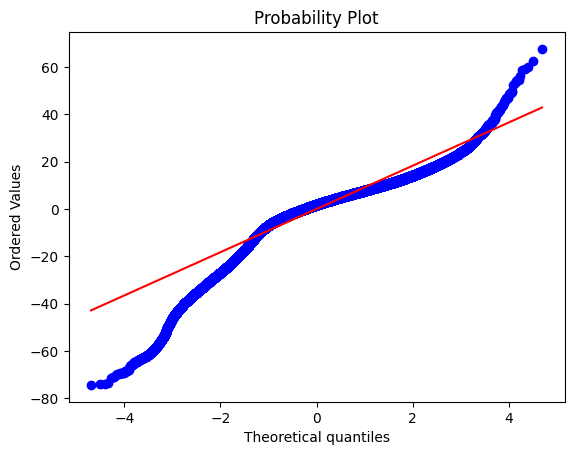

In [ ]:
stats.probplot(result.resid, dist="norm", plot=pylab)
pylab.show()

Demostración gráfica de que los errores no se distribuyen de manera normal

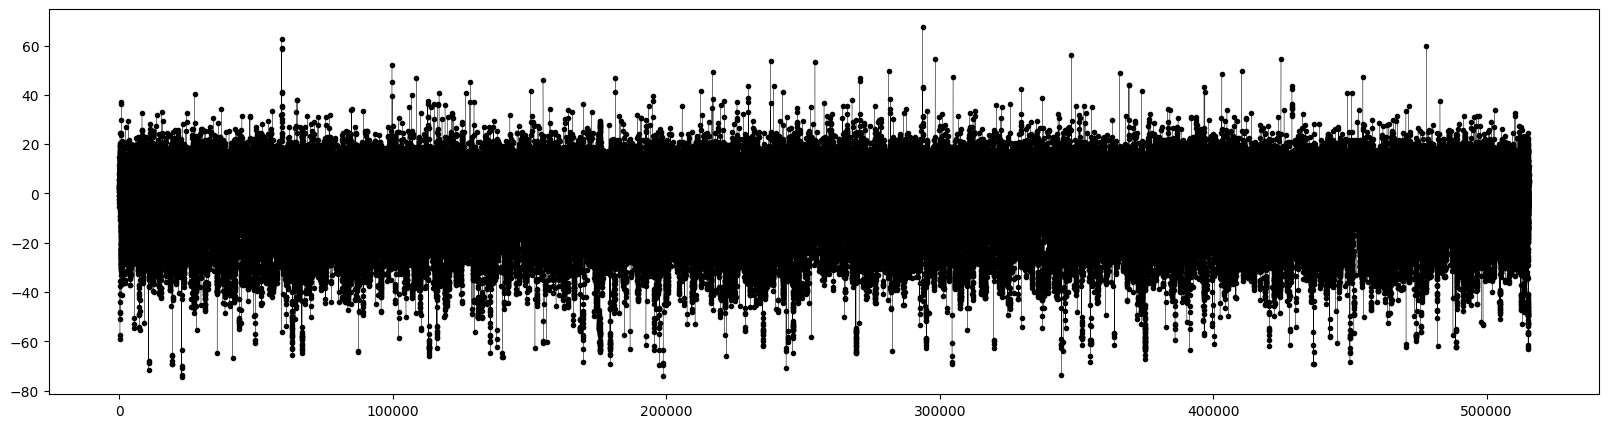

In [ ]:
#plt.plot(result.resid)
plt.figure(figsize = (20,5))
plt.plot(result.resid, '.-', color = "black", linewidth = 0.2)

Se alcanza a observar gráficamente que aparentemente los errores no tienen media cero

Conclusión final: Dado que el R cuadrado ajustado dió 0.222 y ninguno de los supuestos de los errores se cumplió no es conveniente usar este modelo para predecir el año de grabación.

Sin embargo, el modelo de regresión OLS nos arroja que incluso habiendo aplicado Lasso, hay algunas variables no significativas en el modelo, por lo que se procede a sacarlas del conjunto de variables X para evaluar si después de este proceso mejora el modelo ajustado OLS.

In [ ]:
X_diseno_reducida =  sms.add_constant(punto2_X_reducido.drop([26, 77], axis = 1))

model_OLS_punto2_reducido = sms.OLS(punto2_y, X_diseno_reducida) #Ordinary List Square, Creando el modelo de regresión lineal simple (OLS)

result_reducido = model_OLS_punto2_reducido.fit()

result_reducido.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     3069.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:40:35   Log-Likelihood:            -1.8990e+06
No. Observations:              515345   AIC:                         3.798e+06
Df Residuals:                  515296   BIC:                         3.799e+06
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1954.2870      0.178    1.1e+04      0.000    1953.939    1954.635
1              0.8254      0.004    224.198      0.000       0.818       0.833
2             -0.0482      0.000   -136.814      0.000      -0.049      -0.047
3             -0.0469      0.001    -87.777      0.000      -0.048      -0.046
6             -0.2017      0.002   -111.206      0.000      -0.205      -0.198
14             0.0004   1.18e-05     37.397      0.000       0.000       0.000
15            -0.0005   1.89e-05    -27.260      0.000      -0.001      -0.000
16             0.0009   3.04e-05     31.008      0.000       0.001       0.001
17             0.0007    4.1e-05     17.012      0.000       0.001       0.001
18             0.0010   5.94e-05     16.550      0.000       0.001       0.001
19             0.0025   7.32e-05     34.205      0.000       0.002       0.003
20             0.0022   8.91e-05     25.163      0.000       0.002       0.002
21             0.0019      0.000     15.603      0.000       0.002       0.002
23             0.0071      0.000     38.935      0.000       0.007       0.007
25            -0.0024      0.000    -17.547      0.000      -0.003      -0.002
27             0.0022   4.23e-05     51.095      0.000       0.002       0.002
31            -0.0017      0.000     -9.378      0.000      -0.002      -0.001
33            -0.0047      0.000    -15.773      0.000      -0.005      -0.004
36            -0.0010      0.000     -5.990      0.000      -0.001      -0.001
37            -0.0002   3.75e-05     -6.278      0.000      -0.000      -0.000
38             0.0009   3.71e-05     25.163      0.000       0.001       0.001
39             0.0014   7.02e-05     19.375      0.000       0.001       0.001
40            -0.0017      8e-05    -21.013      0.000      -0.002      -0.002
41            -0.0044      0.000    -33.783      0.000      -0.005      -0.004
43            -0.0018      0.000     -7.705      0.000      -0.002      -0.001
47             0.0005   3.24e-05     15.530      0.000       0.000       0.001
48            -0.0021      7e-05    -30.243      0.000      -0.002      -0.002
50             0.0018      0.000     14.416      0.000       0.002       0.002
52            -0.0017      0.000     -7.275      0.000      -0.002      -0.001
57            -0.0026   5.46e-05    -48.362      0.000      -0.003      -0.003
58             0.0017   8.08e-05     21.607      0.000       0.002       0.002
59            -0.0020   9.46e-05    -20.804      0.000      -0.002      -0.002
60            -0.0005      0.000     -3.422      0.001      -0.001      -0.000
63            -0.0026      0.000     -5.375      0.000      -0.004      -0.002
64             0.0014   4.83e-05     29.975      0.000       0.001       0.002
65             0.0002   8.24e-05      2.709      0.007    6.17e-05       0.000
68

In [ ]:
het_breuschpagan(result_reducido.resid, result_reducido.model.exog)

(50557.85331956761, 0.0, 1167.7504678856933, 0.0)

Despues de eliminar las columnas 26 y 77 que no eran significativas, el modelo de regresión OLS no mejora, siguen sin cumplirse los supuestos de los errores, por lo que definitivamente el modelo no sirve para predecir el año de grabación de la canción.

# Punto 3
El conjunto de datos conocido como “California Housing Dataset” puede ser cargado del
paquete sklearn. La variable objetivo es el valor medio de la vivienda para los distritos de
California, expresado en cientos de miles de dólares ($100000).

##Punto 3.1
Lea el conjunto de datos usando la función fetch_california_housing del paquete
sklearn.datasets, guardelos en una variable llamada california_housing y con el comando print(california_housing.DESCR) observe la descripción general del dataset y en especial qué es cada una de las variables de entrada.

In [ ]:
california_housing = datasets.fetch_california_housing()
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

##Punto 3.2
Separe las variables explicativas X de la variable respuesta Y, para acceder a ellas use los comandos california_housing.data y california_housing.target. Considere la conveniencia de incluir las variables Longitud y Latitud al modelo. Haga un análisis exploratorio de las correlaciones entre las variables y comente al respecto.

In [ ]:
punto3_X = california_housing.data
punto3_y = california_housing.target
len(punto3_X)

20640

In [ ]:
columns_punto3 = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]

df_punto3_X = pd.DataFrame(punto3_X, columns=columns_punto3)
df_punto3_y = pd.DataFrame(punto3_y, columns=["MedianHouseValue"])

df_punto3 = pd.concat([df_punto3_X, df_punto3_y], axis=1)
df_punto3

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<Axes: >

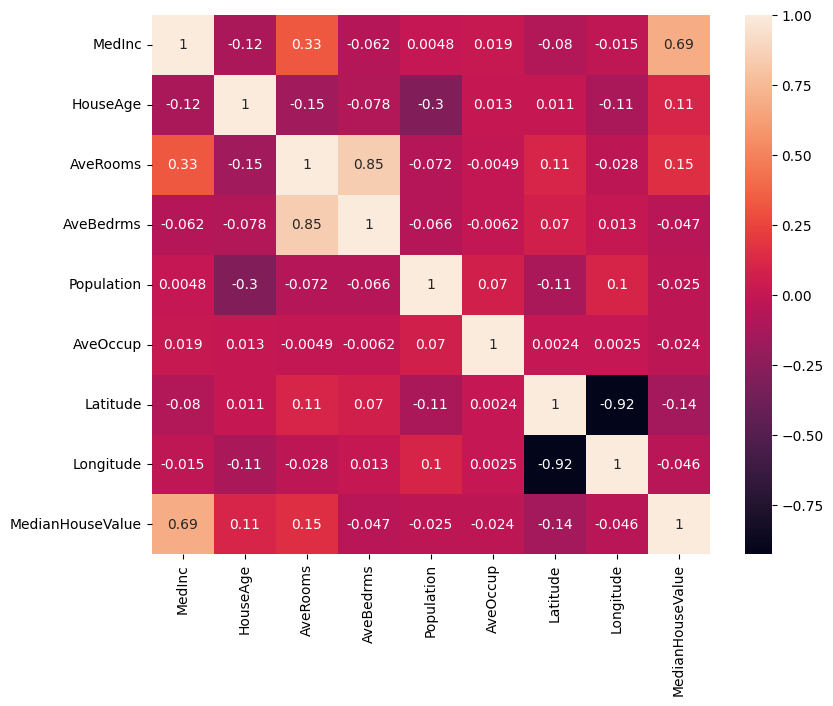

In [ ]:
plt.figure(figsize = (9, 7))
sns.heatmap(df_punto3.corr("pearson"), annot = True)

<Axes: >

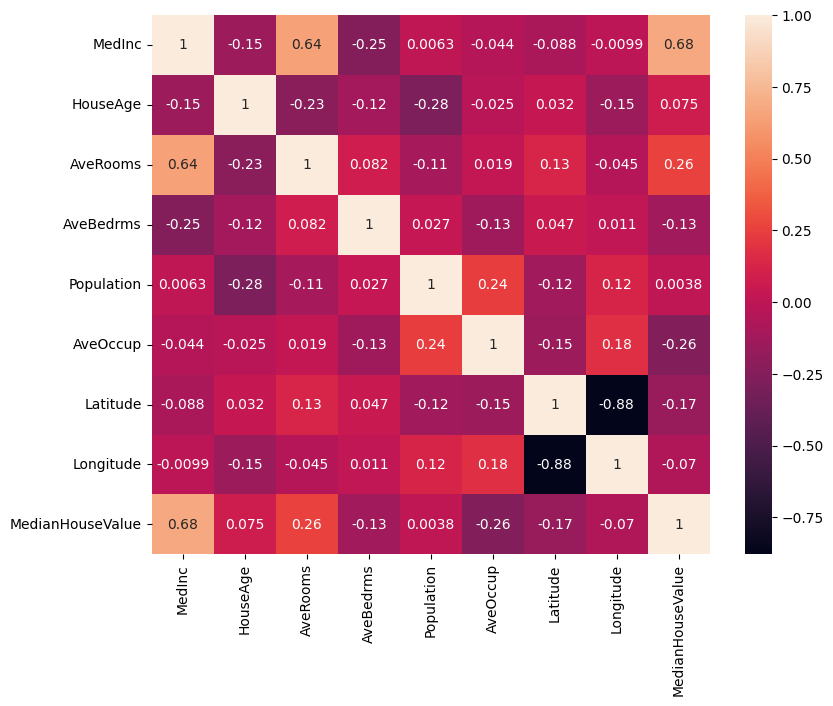

In [ ]:
plt.figure(figsize = (9, 7))
sns.heatmap(df_punto3.corr("spearman"), annot = True)

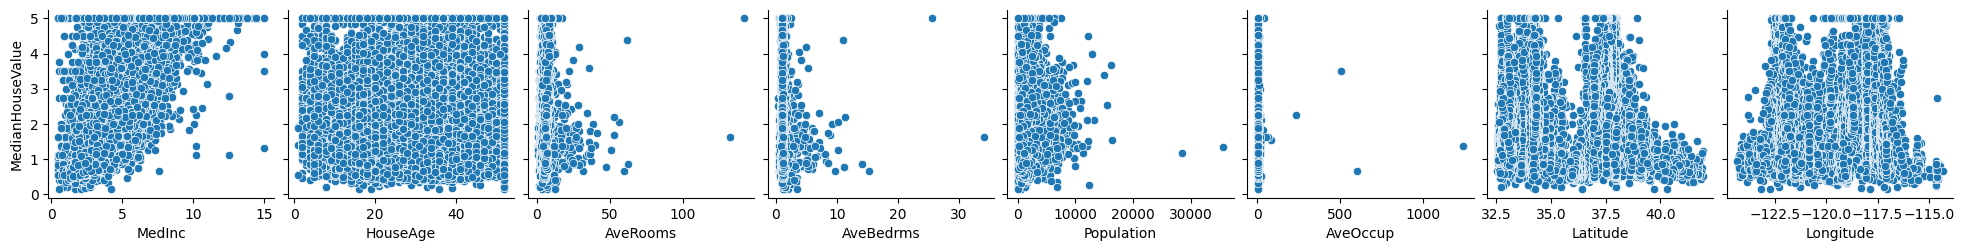

In [ ]:
#sns.pairplot(df_punto3)
sns.pairplot(df_punto3, x_vars=df_punto3_X, y_vars=df_punto3_y, kind='scatter')
plt.show()

Se observa una fuerte correlación positiva entre las variables Latitude y Longitude, además, nuestra variable respuesta está correlacionada moderadamente con la variable MedInc y AvRooms también está correlacionada moderadamente con MedInc

No es conveniente incluir las variables Longitud y Latitud juntas en el modelo ya que estás están fuertemente correlaciondas, lo que generaría que se presenten problemas de multicolinealidad.

Se decide quitar la variable Longitude, porque aunque al quitarla aún hay problemas de multicolinealida, esta es la que menor valor de condicionamiento genera y el R2 nos da un valor más alto.

In [ ]:
df_punto3_X_reducida = df_punto3_X.drop(["Longitude"], axis = 1)

X_diseno_punto3 =  sms.add_constant(df_punto3_X_reducida)

model_OLS_punto3 = sms.OLS(df_punto3_y, X_diseno_punto3) #Ordinary List Square, Creando el modelo de regresión lineal simple (OLS)

result_punto3 = model_OLS_punto3.fit()

result_punto3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MedianHouseValue   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     3498.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:41:20   Log-Likelihood:                -24167.
No. Observations:               20640   AIC:                         4.835e+04
Df Residuals:                   20632   BIC:                         4.841e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6855      0.100      6.853      0.000       0.489       0.882
MedInc         0.5271      0.004    125.655      0.000       0.519       0.535
HouseAge       0.0165      0.000     35.685      0.000       0.016       0.017
AveRooms      -0.1973      0.006    -32.266      0.000      -0.209      -0.185
AveBedrms      0.9362      0.030     31.389      0.000       0.878       0.995
Population  1.651e-05    5.1e-06      3.235      0.001     6.5e-06    2.65e-05
AveOccup      -0.0048      0.001     -9.117      0.000      -0.006      -0.004
Latitude      -0.0307      0.003    -11.694      0.000      -0.036      -0.026
==============================================================================
Omnibus:                     4368.827   Durbin-Watson:                   0.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15212.413
Skew:                           1.049   Prob(JB):                         0.00
Kurtosis:                       6.645   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Punto 3.3
Ajuste un modelo de regresión LASSO con un coeficiente de penalización pequeño, iterativamente ajuste este valor para eliminar variables explicativas y corregir el problema de multicolinealidad, en cada iteración calcule las correlaciones de las variables explicativas y pare cuando no se encuentren correlaciones altas.

In [ ]:
alphas_lasso_punto3 = [0.05, 0.1, 1, 10]

#Primera iteración lasso con alpha de 0.05

data_punto3_X = df_punto3_X_reducida.values
data_punto3_y = df_punto3_y.values

punto3_lasso = Lasso(alpha = alphas_lasso_punto3[0])

punto3_lasso_fit = punto3_lasso.fit(data_punto3_X, data_punto3_y)

punto3_lasso_fit.coef_

array([ 4.18514682e-01,  1.73417168e-02, -8.53160468e-03,  0.00000000e+00,
        2.24131649e-05, -4.05078444e-03, -3.59653516e-02])

In [ ]:
df_punto3_X_reducida_AveBedrms = df_punto3_X_reducida.drop(["AveBedrms"], axis = 1)

<Axes: >

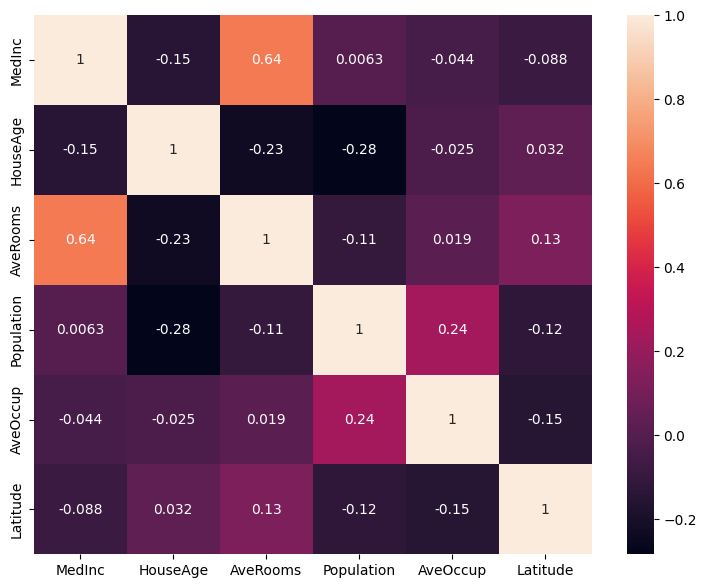

In [ ]:
plt.figure(figsize = (9, 7))
sns.heatmap(df_punto3_X_reducida_AveBedrms.corr("spearman"), annot = True)

In [ ]:
X_diseno_punto3 =  sms.add_constant(df_punto3_X_reducida_AveBedrms)

model_OLS_punto3 = sms.OLS(df_punto3_y, X_diseno_punto3) #Ordinary List Square, Creando el modelo de regresión lineal simple (OLS)

result_punto3 = model_OLS_punto3.fit()

result_punto3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MedianHouseValue   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     3739.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:41:37   Log-Likelihood:                -24648.
No. Observations:               20640   AIC:                         4.931e+04
Df Residuals:                   20633   BIC:                         4.937e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5493      0.098     15.739      0.000       1.356       1.742
MedInc         0.4370      0.003    139.640      0.000       0.431       0.443
HouseAge       0.0176      0.000     37.247      0.000       0.017       0.019
AveRooms      -0.0205      0.002     -8.410      0.000      -0.025      -0.016
Population  1.983e-05   5.22e-06      3.797      0.000    9.59e-06    3.01e-05
AveOccup      -0.0046      0.001     -8.509      0.000      -0.006      -0.004
Latitude      -0.0443      0.003    -16.710      0.000      -0.050      -0.039
==============================================================================
Omnibus:                     4379.455   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11132.049
Skew:                           1.162   Prob(JB):                         0.00
Kurtosis:                       5.747   Cond. No.                     3.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
data_punto3_X = df_punto3_X_reducida_AveBedrms.values
data_punto3_y = df_punto3_y.values

#Segunda iteración lasso con alpha de 0.1

punto3_lasso = Lasso(alpha = alphas_lasso_punto3[1])

punto3_lasso_fit = punto3_lasso.fit(data_punto3_X, data_punto3_y)

punto3_lasso_fit.coef_

array([ 4.01494937e-01,  1.70028310e-02, -0.00000000e+00,  2.42198202e-05,
       -3.53159314e-03, -2.71444421e-02])

In [ ]:
df_punto3_X_reducida_AveRooms = df_punto3_X_reducida_AveBedrms.drop(["AveRooms"], axis = 1)

<Axes: >

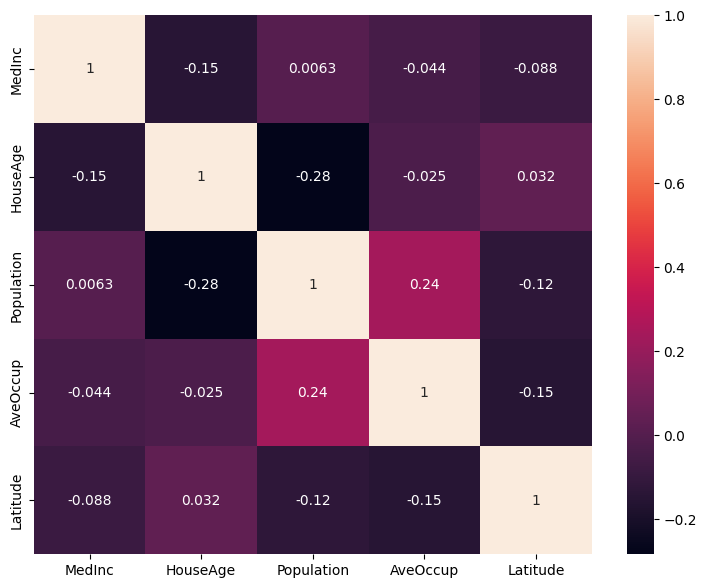

In [ ]:
plt.figure(figsize = (9, 7))
sns.heatmap(df_punto3_X_reducida_AveRooms.corr("spearman"), annot = True)

En este punto se observa que al eliminar la variable AveRooms del modelo, ya no se presentan correlaciones altas entre las variables explicativas.

##Punto 3.4
Ajuste un modelo de regresión OLS con las variables reducidas y revise los residuales.

In [ ]:
X_diseno_punto3 =  sms.add_constant(df_punto3_X_reducida_AveRooms)

model_OLS_punto3 = sms.OLS(df_punto3_y, X_diseno_punto3) #Ordinary List Square, Creando el modelo de regresión lineal simple (OLS)

result_punto3 = model_OLS_punto3.fit()

result_punto3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MedianHouseValue   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     4457.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:41:51   Log-Likelihood:                -24684.
No. Observations:               20640   AIC:                         4.938e+04
Df Residuals:                   20634   BIC:                         4.943e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5507      0.099     15.728      0.000       1.357       1.744
MedInc         0.4284      0.003    144.472      0.000       0.423       0.434
HouseAge       0.0182      0.000     38.875      0.000       0.017       0.019
Population  2.448e-05    5.2e-06      4.706      0.000    1.43e-05    3.47e-05
AveOccup      -0.0046      0.001     -8.478      0.000      -0.006      -0.004
Latitude      -0.0472      0.003    -17.925      0.000      -0.052      -0.042
==============================================================================
Omnibus:                     4203.842   Durbin-Watson:                   0.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10008.016
Skew:                           1.143   Prob(JB):                         0.00
Kurtosis:                       5.533   Cond. No.                     3.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
het_breuschpagan(result_punto3.resid, result_punto3.model.exog)

(509.80398401159135,
 6.108692013957306e-108,
 104.51259786780228,
 2.6807536614363723e-109)

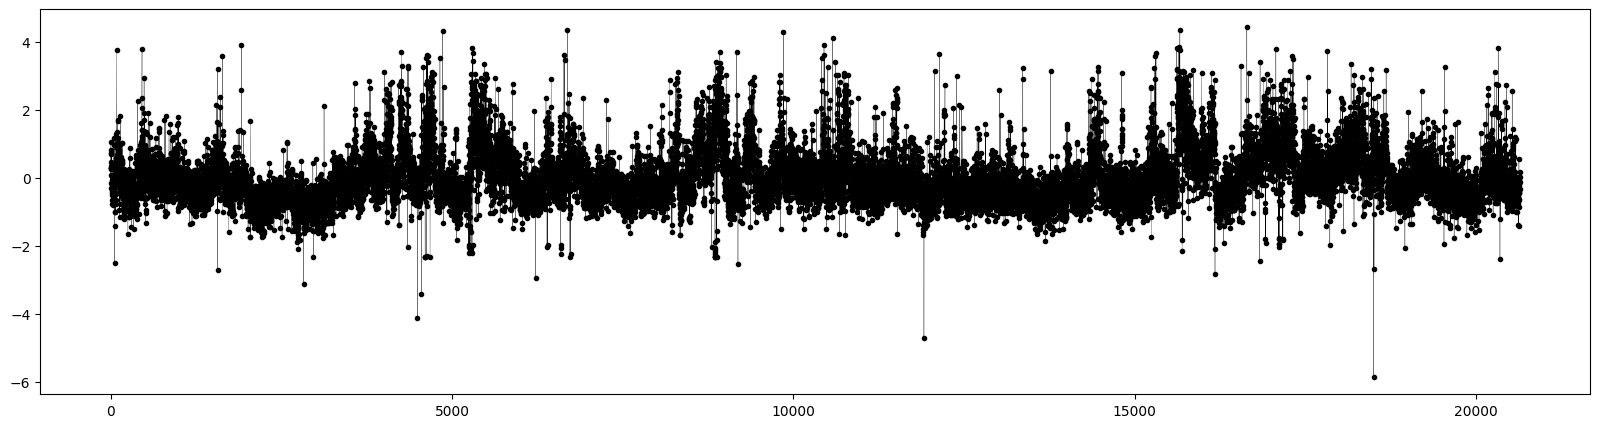

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(result_punto3.resid, '.-', color = "black", linewidth = 0.2)

No se cumple ninguno de los supuestos de los residules

Durbin-Watson:	0.795

Prob(JB):	0.00

breuschpagan para homocedasticidad = 2.6807536614363723e-109

##Punto 3.5
Realice una detección de atípicos usando la distancia de Mahalanobis, eliminelos y vuelva a ajustar el modelo OLS, valide los supuestos del modelo.

In [ ]:
df_punto3_ajustado = pd.concat([df_punto3_X_reducida_AveRooms, df_punto3_y], axis=1)
df_punto3_ajustado

,MedInc,HouseAge,Population,AveOccup,Latitude,MedianHouseValue
0,8.3252,41.0,322.0,2.555556,37.88,4.526
1,8.3014,21.0,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,496.0,2.802260,37.85,3.521
3,5.6431,52.0,558.0,2.547945,37.85,3.413
4,3.8462,52.0,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...
20635,1.5603,25.0,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,741.0,2.123209,39.43,0.847


In [ ]:
x_dm_punto3 = df_punto3_ajustado.copy()
x_menos_mu_punto3 = x_dm_punto3 - np.mean(x_dm_punto3)
cov_punto3 = x_dm_punto3.cov()
inv_cov_punto3 = np.linalg.inv(cov_punto3)

left_term_punto3 = np.dot(x_menos_mu_punto3, inv_cov_punto3)
mahal2_punto3 = np.dot(left_term_punto3, x_menos_mu_punto3.T)
mahal_punto3 = np.sqrt(mahal2_punto3)
D_h_punto3 = mahal_punto3.diagonal()
D_h_punto3

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-249-a0ce6b3d83a4>:8: RuntimeWarning: invalid value encountered in sqrt
  mahal_punto3 = np.sqrt(mahal2_punto3)


array([3.03826516, 2.83356181, 3.01084653, ..., 2.37607033, 2.34893182,
       2.18303814])

In [ ]:
alphas_punto3 = [0.1, 0.05, 0.025, 0.01]

cut_off_punto3 = atipicos_mahalanobis(alphas_punto3, x_dm_punto3, D_h_punto3)

Cantidad de datos atípicos con alpha de 0.1 : 1352
Cantidad de datos atípicos con alpha de 0.05 : 951
Cantidad de datos atípicos con alpha de 0.025 : 706
Cantidad de datos atípicos con alpha de 0.01 : 526


In [ ]:
cut_off_punto3

[3.2626125537164876, 3.54846265920102, 3.801233396602729, 4.100230948345584]

In [ ]:
porcentaje_atipicos = 1352 / x_dm_punto3.shape[0]
porcentaje_atipicos

0.06550387596899225

In [ ]:
x_dm_punto3["outlier"] = np.zeros(x_dm_punto3.shape[0])
x_dm_punto3.loc[D_h_punto3 > cut_off_punto3[0], "outlier"] = 1

#punto3_sin_outliers = x_dm_punto3.query('outlier == 1')
#punto3_sin_outliers = x_dm_punto3.drop("outlier" == 1, axis = 0)

In [ ]:
x_dm_punto3.drop(x_dm_punto3[x_dm_punto3["outlier"] == 1].index, inplace = True)
x_dm_punto3.query('outlier == 1')

,MedInc,HouseAge,Population,AveOccup,Latitude,MedianHouseValue,outlier


In [ ]:
X_diseno_punto3_sin_atipicos = sms.add_constant(x_dm_punto3.drop(["MedianHouseValue", "outlier"], axis = 1))

model_OLS_punto3_sin_atipicos = sms.OLS(x_dm_punto3["MedianHouseValue"], X_diseno_punto3_sin_atipicos) #Ordinary List Square, Creando el modelo de regresión lineal simple (OLS)

result_punto3_sin_atipicos = model_OLS_punto3_sin_atipicos.fit()

result_punto3_sin_atipicos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MedianHouseValue   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     5823.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:43:37   Log-Likelihood:                -18921.
No. Observations:               19288   AIC:                         3.785e+04
Df Residuals:                   19282   BIC:                         3.790e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3175      0.089     26.151      0.000       2.144       2.491
MedInc         0.4674      0.003    154.793      0.000       0.461       0.473
HouseAge       0.0194      0.000     48.082      0.000       0.019       0.020
Population  9.549e-05   6.27e-06     15.238      0.000    8.32e-05       0.000
AveOccup      -0.2642      0.006    -45.439      0.000      -0.276      -0.253
Latitude      -0.0565      0.002    -25.366      0.000      -0.061      -0.052
==============================================================================
Omnibus:                     1731.642   Durbin-Watson:                   0.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2486.526
Skew:                           0.717   Prob(JB):                         0.00
Kurtosis:                       4.018   Cond. No.                     2.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(array([1.700e+02, 3.430e+03, 9.181e+03, 4.667e+03, 1.458e+03, 3.570e+02,
        2.100e+01, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([-1.99143153, -1.26942454, -0.54741754,  0.17458945,  0.89659645,
         1.61860344,  2.34061044,  3.06261743,  3.78462443,  4.50663142,
         5.22863841]),
 <BarContainer object of 10 artists>)

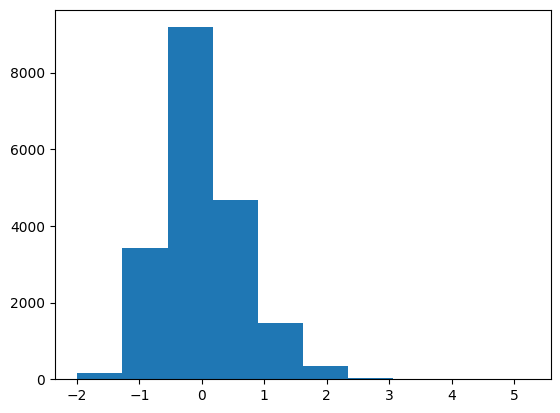

In [ ]:
plt.hist(result_punto3_sin_atipicos.resid)

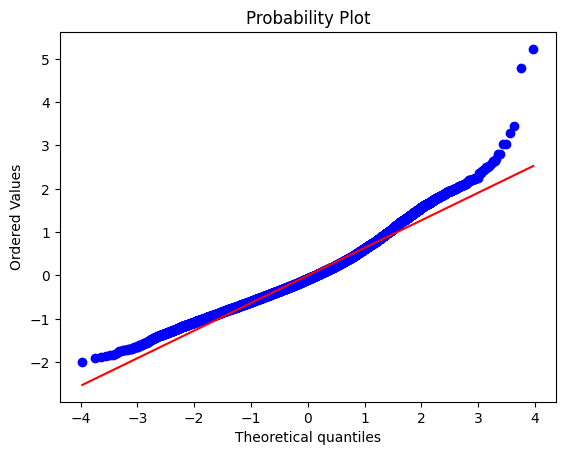

In [ ]:
stats.probplot(result_punto3_sin_atipicos.resid, dist="norm", plot=pylab)
pylab.show()

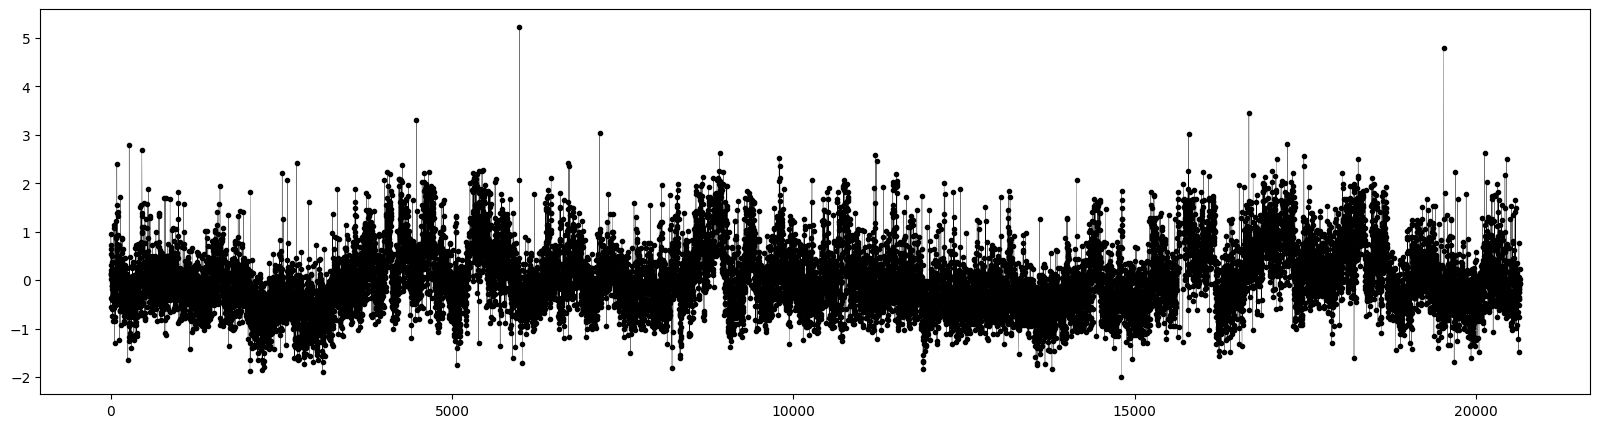

In [ ]:
#plt.plot(result_punto3_sin_atipicos.resid)
plt.figure(figsize = (20,5))
plt.plot(result_punto3_sin_atipicos.resid, '.-', color = "black", linewidth = 0.2)

Renunciando a un 6.5% de las obsrvaciones, que son las observaciones atípicas con un percentil de 0.9, los supuestos en los residuales siguen sin cumplirse